In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import plotly.colors as pc

In [13]:
file_path = '/home/brishti/cleaned_candidates_chess_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
headers = df.columns.tolist()
print("Headers:", headers)
df_grouped = df.groupby(["Opening_Family", "Short_Opening_Name","Full_Opening_Name"]).size().reset_index(name="Count")

Headers: ['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result', 'ECO', 'Moves', 'Full_Opening_Name', 'Short_Opening_Name', 'Opening_Family', 'Year', 'Event w/Year', 'White_Score', 'Black_Score', 'Game_Outcome', 'Winner', 'Round_Number', 'Opening_Family_Grouped']


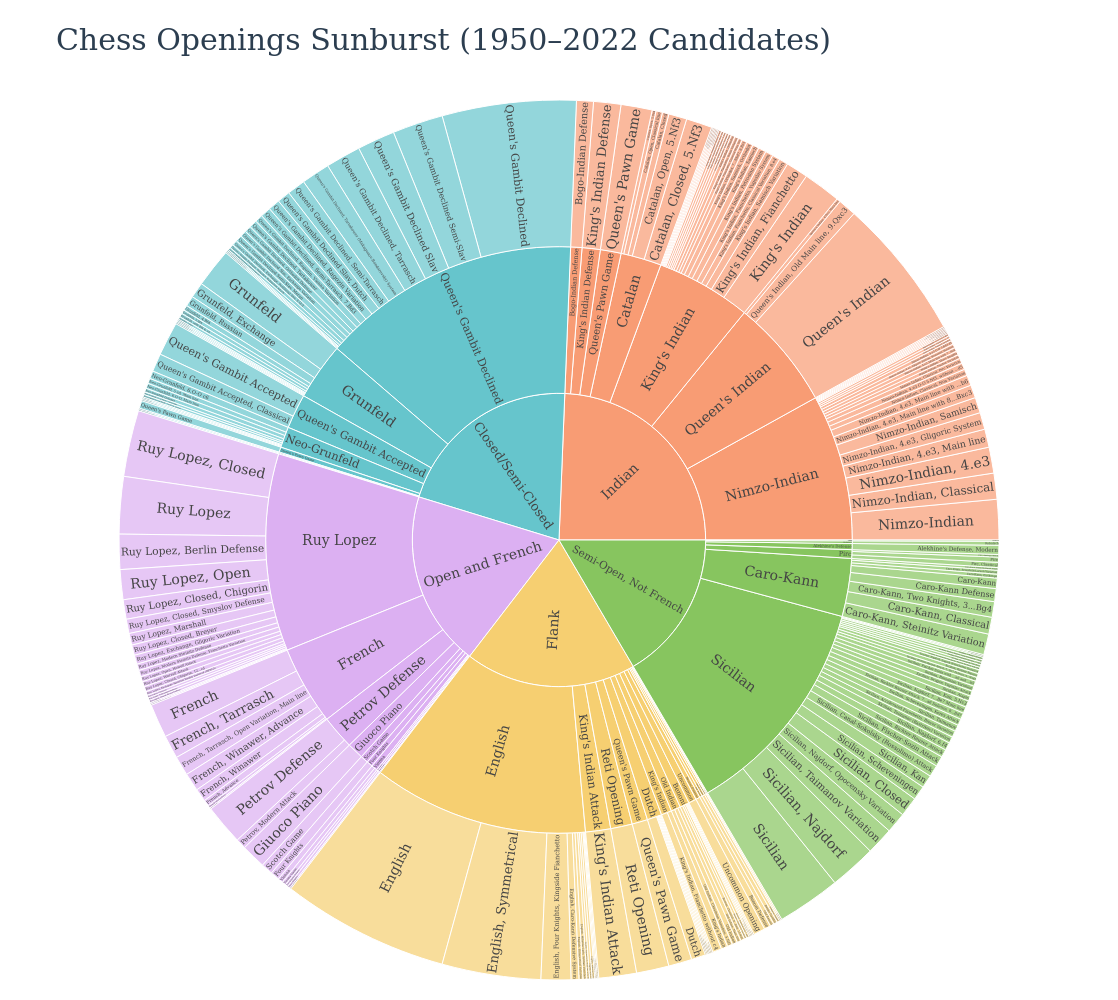

In [17]:
fig = px.sunburst(
    df_grouped,
    path=["Opening_Family", "Short_Opening_Name","Full_Opening_Name"],
    values="Count",
    color="Opening_Family",
    color_discrete_sequence=pc.qualitative.Pastel,
    title="Chess Openings Sunburst (1950–2022 Candidates)"
)

fig.update_layout(
    width=1000,  # default is ~700
    height=1000,  # increase for more space
    margin=dict(t=100, l=20, r=20, b=20),
    font=dict(family="Georgia", size=18, color="#2c3e50"),
    title_font=dict(size=30, family="Georgia", color="#2c3e50"),
    paper_bgcolor="white"
)

fig.update_traces(
    insidetextorientation='radial',
    textfont_size=14,
    hovertemplate="<b>%{label}</b><br>Games: %{value}<extra></extra>"
)

fig.show()